# Метрики для оценки качества классификационной модели

---

**Источники:**
    
[МЕТРИКИ ОЦЕНКИ КЛАССИФИКАТОРОВ В ЗАДАЧАХ МЕДИЦИНСКОЙ
ДИАГНОСТИКИ](https://core.ac.uk/download/pdf/196226627.pdf)

[Оценка классификатора (точность, полнота, F-мера)](http://bazhenov.me/blog/2012/07/21/classification-performance-evaluation.html)

[Метрики в задачах машинного обучения](https://habr.com/ru/company/ods/blog/328372/)

[Как правильно выбрать метрику оценки для моделей машинного обучения: Часть 3 Классификационные метрики](https://www.machinelearningmastery.ru/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-3-classification-3eac420ec991/)

[Метрики для оценки алгоритмов машинного обучения в Python](https://www.machinelearningmastery.ru/metrics-evaluate-machine-learning-algorithms-python/)

[Оценка качества в задачах классификации и регрессии](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%D1%85_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8)

---

**Пакет Python: [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)**

In [1]:
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Mатрица ошибок (confusion matrix)

In [2]:
font = {'size' : 15}

plt.rc('font', **font)

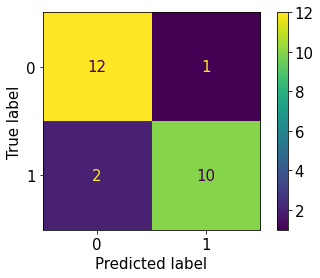

In [3]:


X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test)  

**ИЛИ**

In [4]:
# Воспользуемся функцией построения матрицы ошибок из документации sklearn
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[12  1]
 [ 2 10]]


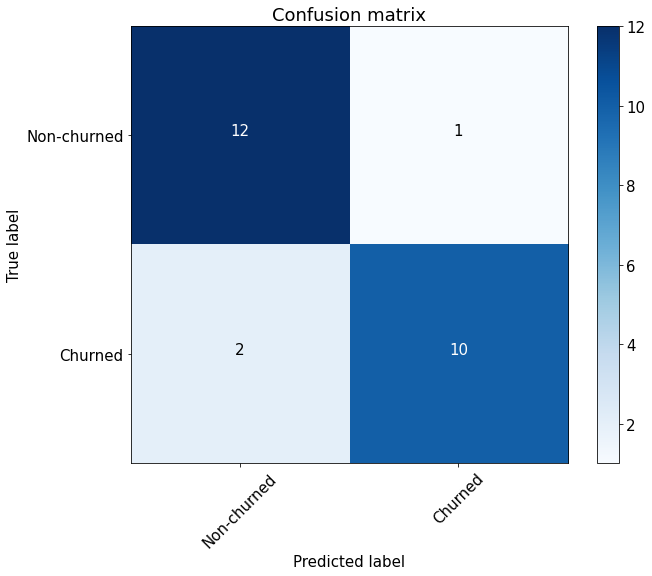

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import itertools



cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

Look at first row. The first row is for customers whose actual churn value in test set is 1.
As you can calculate, out of 40 customers, the churn value of 15 of them is 1. 
And out of these 15, the classifier correctly predicted 6 of them as 1, and 9 of them as 0. 

It means, for 6 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 9 customers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row.

What about the customers with churn value 0? Lets look at the second row.
It looks like  there were 25 customers whom their churn value were 0. 

The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about confusion matrix is that shows the model"s ability to correctly predict or separate the classes.  In specific case of binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives. 

## Аккуратность (Accuracy)

## Точность (Precision), Полнота (recall) и F-мера (F-score)

## Precison-recall кривая

## ROC-кривая (AUC-ROC и AUC-PR)

## Логистическая функция потерь (Logistic Loss)
